### Find Word Images Padding Picture In Picture

In [1]:
import cv2
import PIL
from PIL import Image, ImageFilter, ImageOps
import matplotlib.pyplot as plt
import os
import sys
import pandas as pd
import numpy as np
import re
import glob
from pathlib import Path
import shutil
from os.path import isfile, join

In [2]:
# language pair
lang_folder = "Turkish"  # Arabic, English, French, German, Turkish, Spanish, Portuguese, Dutch, Italian ==> target language for learner
#lang_pair = "English"  # Arabic, English, French, German, Turkish, Spanish, Portuguese, Dutch, Italian ==> native language

file_ext = 1000

In [3]:
#word_lemma_all_data_path = f"/media/kurubal/SSD/Data Scientist/Work/Modern Ways/Project/{lang_folder.capitalize()}/\
#Lemma Stem POS/Result/3-2-Word In Visual Genome Merge"

visual_genome_process_data_path = f"/media/kurubal/SSD/Data Scientist/Work/Modern Ways/Project/{lang_folder.capitalize()}/\
Lemma Stem POS/Result/3-0-Visual Genome Process"

path = f"/media/kurubal/SSD/Data Scientist/Work/Modern Ways/Project/{lang_folder.capitalize()}/\
Lemma Stem POS/Result/3-5-Find Word Images Padding Picture In Picture"

#Path(path).mkdir(parents=True, exist_ok=True)

In [4]:
def image_padding_aspect_ratio(data_folder_name, data_path, out_folder_name, out_path, padding_color = (0,0,0), aspect_ratio_width = 16, aspect_ratio_height = 9):
       '''
       image_padding_aspect_ratio(data_folder_name, data_path, out_folder_name, out_path, padding_color = (0,0,0), aspect_ratio_width = 16, aspect_ratio_height = 9)\n
       data_folder_name, data_path, out_folder_name, out_path are path and folder in string(str). others are cv2 parameter and image aspect ratio parameter.\n
       ex.\n
       output_path = f"/home/kurubal/Documents/Modern Ways/Project/{lang_folder.capitalize()}/Image Audio Video/Data/28 Words"\n
       image_path = f"/home/kurubal/Documents/Modern Ways/Project/{lang_folder.capitalize()}/Image Audio Video/Data/28 Words"\n
       image_padding_aspect_ratio("Images_SV_Rename", image_path, "Images_SV", output_path, padding_color = (0,0,0), aspect_ratio_width = 16, aspect_ratio_height = 9)
       '''
       error_file_list = []
       result_path = f"{out_path}/{out_folder_name}"
       data_folder_path = f"{data_path}/{data_folder_name}"
       Path(result_path).mkdir(parents=True, exist_ok=True)
       files=[f for f in os.listdir(data_folder_path) if isfile(join(data_folder_path,f))]   
       for i in range(len(files)):       
          pathfilename=data_folder_path+'/'+files[i]
          #filename_without_ext = os.path.splitext(files[i])[0]
          #text = f"{text}"
          if isfile(f"{result_path}/{files[i]}"):
                 pass
          else:
                 try:
                        img = cv2.imread(f"{pathfilename}")
                        old_image_height, old_image_width, channels = img.shape  # 2718  1988

                        #aspect_ratio_width = 16
                        #aspect_ratio_height = 9

                        if (old_image_height/aspect_ratio_height) > (old_image_width/aspect_ratio_width):
                               new_image_width = int((old_image_height/aspect_ratio_height)*aspect_ratio_width)
                               new_image_height = int(old_image_height)
                        elif (old_image_height/aspect_ratio_height) < (old_image_width/aspect_ratio_width):
                               new_image_width = int(old_image_width)
                               new_image_height = int((old_image_width/aspect_ratio_width)*aspect_ratio_height)
                        elif (old_image_height/aspect_ratio_height) == (old_image_width/aspect_ratio_width):
                               new_image_width = int((old_image_height/aspect_ratio_height)*aspect_ratio_width)
                               new_image_height = int(old_image_height)
                        else:
                               new_image_width = old_image_width
                               new_image_height = old_image_height

                        color = padding_color
                        result = np.full((new_image_height,new_image_width, channels), color, dtype=np.uint8)

                        # compute center offset
                        x_center = (new_image_width - old_image_width) // 2
                        y_center = (new_image_height - old_image_height) // 2

                        # copy img image into center of result image
                        result[y_center:y_center+old_image_height, x_center:x_center+old_image_width] = img            

                        cv2.imwrite(f"{result_path}/{files[i]}", result)
                 except:
                        print("Oops!", sys.exc_info()[0], "occurred.")
                        error_file_list.append(files[i])
                        
       return error_file_list

In [5]:
def image_padding_aspect_ratio_standalone(image_path_file, padding_color = (0,0,0), aspect_ratio_width = 16, aspect_ratio_height = 9): # ??? will edit
       '''
       image_padding_aspect_ratio_standalone(image_path_file, padding_color = (0,0,0), aspect_ratio_width = 16, aspect_ratio_height = 9)\n
       image_path_file are path, folder and file in string(str). others are cv2 parameter and image aspect ratio parameter.\n
       ex.\n
       image_path_file = "/home/kurubal/Downloads/2333869.jpg"\n
       image_padding_aspect_ratio_standalone(image_path_file, padding_color = (0,0,0), aspect_ratio_width = 16, aspect_ratio_height = 9)
       '''
       error_file_list = []
       size = (1600, 900)  # image new size (width, height)
       # path process
       path_split_list = os.path.split(image_path_file)
       main_path = path_split_list[0]  # part of before last one
       file = path_split_list[1]  # last file or folder
       filename_without_ext = os.path.splitext(file)[0]  # file without .jpg
       filename_ext = os.path.splitext(file)[1]  # file extention as .jpg
       # file process
       if isfile(f"{main_path}/{filename_without_ext}_padded{filename_ext}"):
              pass
       else:
              try:
                     img = cv2.imread(f"{image_path_file}")
                     old_image_height, old_image_width, channels = img.shape 

                     if (old_image_height/aspect_ratio_height) > (old_image_width/aspect_ratio_width):
                            new_image_width = int((old_image_height/aspect_ratio_height)*aspect_ratio_width)
                            new_image_height = int(old_image_height)
                     elif (old_image_height/aspect_ratio_height) < (old_image_width/aspect_ratio_width):
                            new_image_width = int(old_image_width)
                            new_image_height = int((old_image_width/aspect_ratio_width)*aspect_ratio_height)
                     elif (old_image_height/aspect_ratio_height) == (old_image_width/aspect_ratio_width):
                            new_image_width = int((old_image_height/aspect_ratio_height)*aspect_ratio_width)
                            new_image_height = int(old_image_height)
                     else:
                            new_image_width = old_image_width
                            new_image_height = old_image_height

                     color = padding_color
                     result = np.full((new_image_height,new_image_width, channels), color, dtype=np.uint8)

                     # compute center offset
                     x_center = (new_image_width - old_image_width) // 2
                     y_center = (new_image_height - old_image_height) // 2

                     # copy img image into center of result image
                     result[y_center:y_center+old_image_height, x_center:x_center+old_image_width] = img

                     # image resize
                     result_resize = cv2.resize(result, size, interpolation = cv2.INTER_AREA)            

                     cv2.imwrite(f"{main_path}/{filename_without_ext}_padded{filename_ext}", result_resize)
              except:
                     print("Oops!", sys.exc_info()[0], "occurred.")
                     error_file_list.append(image_path_file)
                        
       return error_file_list

In [26]:
def picture_in_picture(main_image_file_path, add_image_file_path, add_pic_size=8, add_pic_pos=["top","left"], add_pic_margin=10, border_color="red"):
    '''picture_in_picture(main_image_file_path, add_image_file_path, add_pic_size=8, add_pic_pos=["top","left"], add_pic_margin=10, border_color="red")\n
    main_image_file_path is master image file path or file, add_image_file_path is slave image that use for paste on master image. add_pic_size is slave image size that\n
    is master_image_width(1600px)/add_pic_size(8)=200px. add_pic_pos refers to slave image position on master image. add_pic_margin is slave image shift from edges.\n
    border_color is slave image border color for highlight.\n
    ex.\n
    picture_in_picture("gibi.jpg", "Group 36.jpg", add_pic_pos = ["bottom","left"], add_pic_margin = 10, border_color = "red")
    '''
    # main image
    try:  
        image_main = Image.open(f"{main_image_file_path}")  # 1600*900 px
    except:
        image_main = main_image_file_path
        
    width_main, height_main = image_main.size

    # additional image
    image_add = Image.open(f"{add_image_file_path}")  # square image
    height_add_edit = int(width_main/add_pic_size)  # 1600/8 = 200 px
    width_add_edit = int(width_main/add_pic_size)
    new_size_add = (height_add_edit ,width_add_edit)
    image_add_resize = image_add.resize(new_size_add)
    # border
    border_thickness = (3, 3, 3, 3)
    image_add_resize_border = ImageOps.expand(image_add_resize, border=border_thickness, fill=border_color)
    width_add, height_add = image_add_resize_border.size

    if (add_pic_pos[0] == "top") and (add_pic_pos[1] == "left"):
        image_main.paste(image_add_resize_border, (add_pic_margin, add_pic_margin)) # x_koor, y_koor
    elif (add_pic_pos[0] == "top") and (add_pic_pos[1] == "right"):
        image_main.paste(image_add_resize_border, ((width_main-width_add-add_pic_margin), add_pic_margin))
    elif (add_pic_pos[0] == "bottom") and (add_pic_pos[1] == "left"):
        image_main.paste(image_add_resize_border, (add_pic_margin, (height_main-height_add-add_pic_margin)))
    elif (add_pic_pos[0] == "bottom") and (add_pic_pos[1] == "right"):
        image_main.paste(image_add_resize_border, ((width_main-width_add-add_pic_margin), (height_main-height_add-add_pic_margin)))
    elif (add_pic_pos[0] == "center") and (add_pic_pos[1] == "center"):
        image_main.paste(image_add_resize_border, ((int(width_main/2)-int(width_add/2)), (int(height_main/2)-int(height_add/2))))
    elif (add_pic_pos[0] == "left") and (add_pic_pos[1] == "center"):
        image_main.paste(image_add_resize_border, (add_pic_margin, (int(height_main/2)-int(height_add/2))))
    elif (add_pic_pos[0] == "right") and (add_pic_pos[1] == "center"):
       image_main.paste(image_add_resize_border, (width_main-width_add-add_pic_margin, (int(height_main/2)-int(height_add/2))))
    elif (add_pic_pos[0] == "top") and (add_pic_pos[1] == "center"):
        image_main.paste(image_add_resize_border, ((int(width_main/2)-int(width_add/2)), add_pic_margin))
    elif (add_pic_pos[0] == "bottom") and (add_pic_pos[1] == "center"):
        image_main.paste(image_add_resize_border, ((int(width_main/2)-int(width_add/2)), (height_main-height_add-add_pic_margin)))
    else:
        pass

    return image_main

#### Pronouns Image Padding Aspect Ratio

In [6]:
pron_output_path = f"/home/kurubal/Downloads"

Path(pron_output_path).mkdir(parents=True, exist_ok=True)

In [7]:
pron_image_path = f"/home/kurubal/Downloads"

In [8]:
#image_padding_aspect_ratio("Pronouns", pron_image_path, "Pronouns_Padding", pron_output_path, padding_color = (255,255,255), aspect_ratio_width = 1, aspect_ratio_height = 1)  # /media/kurubal/SSD/Data Scientist/Work/Modern Ways/Project/Turkish/Image Audio Video/Data/Pronouns_Padding 

#### Select Image Padding

In [7]:
select_image_path = f"/media/kurubal/SSD/Data Scientist/Work/Modern Ways/Project/{lang_folder.capitalize()}/Image Audio Video/Data/{file_ext} Words/Image_Genome"

In [8]:
image_main_folder_list = os.listdir(f"{select_image_path}")
image_main_folder_list

['ALL_OTHER_FOLDER', 'ALL_VERB_FOLDER']

In [10]:
other_file_list = glob.glob(f"{select_image_path}/ALL_OTHER_FOLDER/*/*")  # other .jpg files
#other_file_list

['/media/kurubal/SSD/Data Scientist/Work/Modern Ways/Project/Turkish/Image Audio Video/Data/1000 Words/Image_Genome/ALL_OTHER_FOLDER/altı/2325267_53119333157.jpg',
 '/media/kurubal/SSD/Data Scientist/Work/Modern Ways/Project/Turkish/Image Audio Video/Data/1000 Words/Image_Genome/ALL_OTHER_FOLDER/altı/2325503.jpg',
 '/media/kurubal/SSD/Data Scientist/Work/Modern Ways/Project/Turkish/Image Audio Video/Data/1000 Words/Image_Genome/ALL_OTHER_FOLDER/altı/2332889_110484552.jpg',
 '/media/kurubal/SSD/Data Scientist/Work/Modern Ways/Project/Turkish/Image Audio Video/Data/1000 Words/Image_Genome/ALL_OTHER_FOLDER/altı/2332951_8353257108.jpg',
 '/media/kurubal/SSD/Data Scientist/Work/Modern Ways/Project/Turkish/Image Audio Video/Data/1000 Words/Image_Genome/ALL_OTHER_FOLDER/altı/2339326_7723580109.jpg',
 '/media/kurubal/SSD/Data Scientist/Work/Modern Ways/Project/Turkish/Image Audio Video/Data/1000 Words/Image_Genome/ALL_OTHER_FOLDER/altı/2362374_4125172172.jpg',
 '/media/kurubal/SSD/Data Scienti

In [12]:
verb_file_list = glob.glob(f"{select_image_path}/ALL_VERB_FOLDER/*/*/*")  # verb .jpg files
#verb_file_list

['/media/kurubal/SSD/Data Scientist/Work/Modern Ways/Project/Turkish/Image Audio Video/Data/1000 Words/Image_Genome/ALL_VERB_FOLDER/al/al/2319635_30033514565.jpg',
 '/media/kurubal/SSD/Data Scientist/Work/Modern Ways/Project/Turkish/Image Audio Video/Data/1000 Words/Image_Genome/ALL_VERB_FOLDER/al/al/2359943.jpg',
 '/media/kurubal/SSD/Data Scientist/Work/Modern Ways/Project/Turkish/Image Audio Video/Data/1000 Words/Image_Genome/ALL_VERB_FOLDER/al/al/2373700.jpg',
 '/media/kurubal/SSD/Data Scientist/Work/Modern Ways/Project/Turkish/Image Audio Video/Data/1000 Words/Image_Genome/ALL_VERB_FOLDER/al/al/2374495.jpg',
 '/media/kurubal/SSD/Data Scientist/Work/Modern Ways/Project/Turkish/Image Audio Video/Data/1000 Words/Image_Genome/ALL_VERB_FOLDER/al/al/2392754.jpg',
 '/media/kurubal/SSD/Data Scientist/Work/Modern Ways/Project/Turkish/Image Audio Video/Data/1000 Words/Image_Genome/ALL_VERB_FOLDER/al/al/2400957.jpg',
 '/media/kurubal/SSD/Data Scientist/Work/Modern Ways/Project/Turkish/Image A

In [30]:
image_path_file = "/home/kurubal/Downloads/2333869.jpg"

In [31]:
image_padding_aspect_ratio_standalone(image_path_file, padding_color = (0,0,0), aspect_ratio_width = 16, aspect_ratio_height = 9)

[]

In [ ]:
# will test
#for image_path_file in other_file_list:
#    image_padding_aspect_ratio_standalone(image_path_file, padding_color = (0,0,0), aspect_ratio_width = 16, aspect_ratio_height = 9)

In [ ]:
# will test
#for image_path_file in verb_file_list:
#    image_padding_aspect_ratio_standalone(image_path_file, padding_color = (0,0,0), aspect_ratio_width = 16, aspect_ratio_height = 9)

#### Visual Genome Word Lemma All Category Data

In [9]:
df_word_prefix_suffix_file = pd.read_excel(f"/media/kurubal/SSD/Data Scientist/Work/Modern Ways/Project/{lang_folder.capitalize()}/\
Lemma Stem POS/Result/2-1-Word Prefix Suffix Analysis/{lang_folder.capitalize()}_{file_ext}_Word_Person_Case_Tense_Plural_Mean.xlsx")
df_word_prefix_suffix_file

,search_word,POS1,POS2,word,lemma.spacy,stem,word_en_translate,lemma_en_translate,frequency,prefix_suffix,tense,person,case,plural,mean,other
0,bir,NUM,NaN,bir,bir,bir,a,a,18835735,+,NaN,NaN,NaN,NaN,NaN,NaN
1,bir,ADV,NaN,biraz,biraz,bir,a little,a little,1269641,+az,NaN,NaN,NaN,NaN,NaN,NaN
2,bir,PRON,NaN,biri,biri,bir,somebody,somebody,837400,+i,NaN,NaN,belirtme,NaN,NaN,NaN
3,bir,ADV,NaN,birlikte,birlikte,bir,together,together,409940,+likte,NaN,NaN,bulunma,NaN,NaN,NaN
4,bir,NOUN,NaN,birini,biri,bir,one,somebody,259916,+ini,NaN,3.tekil,belirtme,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1619,veriyor,VERB,NaN,veriyorum,ver,ver,i give,give,126290,+um,NaN,1.tekil,NaN,NaN,NaN,NaN
1620,veriyor,VERB,NaN,veriyor,ver,ver,giving,give,68163,+,şimdiki,NaN,NaN,NaN,NaN,NaN
1621,okul,NOUN,NaN,okul,okul,oku,school,school,68160,+,NaN,NaN,NaN,NaN,NaN,NaN
1622,suçlu,NOUN,NaN,suçlu,suç,suç,guilty,crime,68124,+,NaN,3.tekil,belirtme,NaN,NaN,NaN


In [10]:
df_genome_word_lemma_all_category_concat = pd.read_excel(f"/media/kurubal/SSD/Data Scientist/Work/Modern Ways/Project/{lang_folder.capitalize()}/\
Lemma Stem POS/Result/3-2-Word In Visual Genome Merge/Visual_Genome_{file_ext}_Word_Lemma_All_Category_Concat_Result.xlsx")
df_genome_word_lemma_all_category_concat

,POS1,POS2,word,lemma.spacy,stem,word_en_translate,lemma_en_translate,frequency,object_id,names,...,y_koor,num,attributes,sub_name,sub_object_id,questions,que_and_ans_id,answers,phrases,region_id
0,NUM,NaN,bir,bir,bir,a,a,18835735,4446407.0,a,...,305.0,2920126305,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NUM,NaN,bir,bir,bir,a,a,18835735,3904298.0,a,...,113.0,129190150113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NUM,NaN,bir,bir,bir,a,a,18835735,3904300.0,a,...,233.0,123317182233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NUM,NaN,bir,bir,bir,a,a,18835735,3902259.0,a,...,168.0,4615142168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NUM,NaN,bir,bir,bir,a,a,18835735,3902256.0,a,...,97.0,54188097,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197127,VERB,NaN,çekilin,çek,çek,withdraw,check,69201,NaN,NaN,...,37.0,276026737,NaN,NaN,NaN,NaN,NaN,NaN,airport check in kiosks,4492506.0
197128,VERB,NaN,çekilin,çek,çek,withdraw,check,69201,NaN,NaN,...,459.0,376517459,NaN,NaN,NaN,NaN,NaN,NaN,red check of tablecloth,726657.0
197129,VERB,NaN,çekilin,çek,çek,withdraw,check,69201,NaN,NaN,...,236.0,95132301236,NaN,NaN,NaN,NaN,NaN,NaN,a check is on the table,1814370.0
197130,VERB,NaN,çekilin,çek,çek,withdraw,check,69201,NaN,NaN,...,194.0,2211405194,NaN,NaN,NaN,NaN,NaN,NaN,cleats with white check,2132765.0


In [11]:
select_image_id_list = list(set(df_genome_word_lemma_all_category_concat["image_id"]))
select_num_list = list(set(df_genome_word_lemma_all_category_concat["num"]))

In [12]:
df_genome_word_lemma_all_category_concat["POS1"].value_counts()

NOUN     87123
VERB     51815
ADJ      24838
PRON     16993
ADV       7351
NUM       3024
CCONJ     2945
ADP       1606
AUX       1437
Name: POS1, dtype: int64

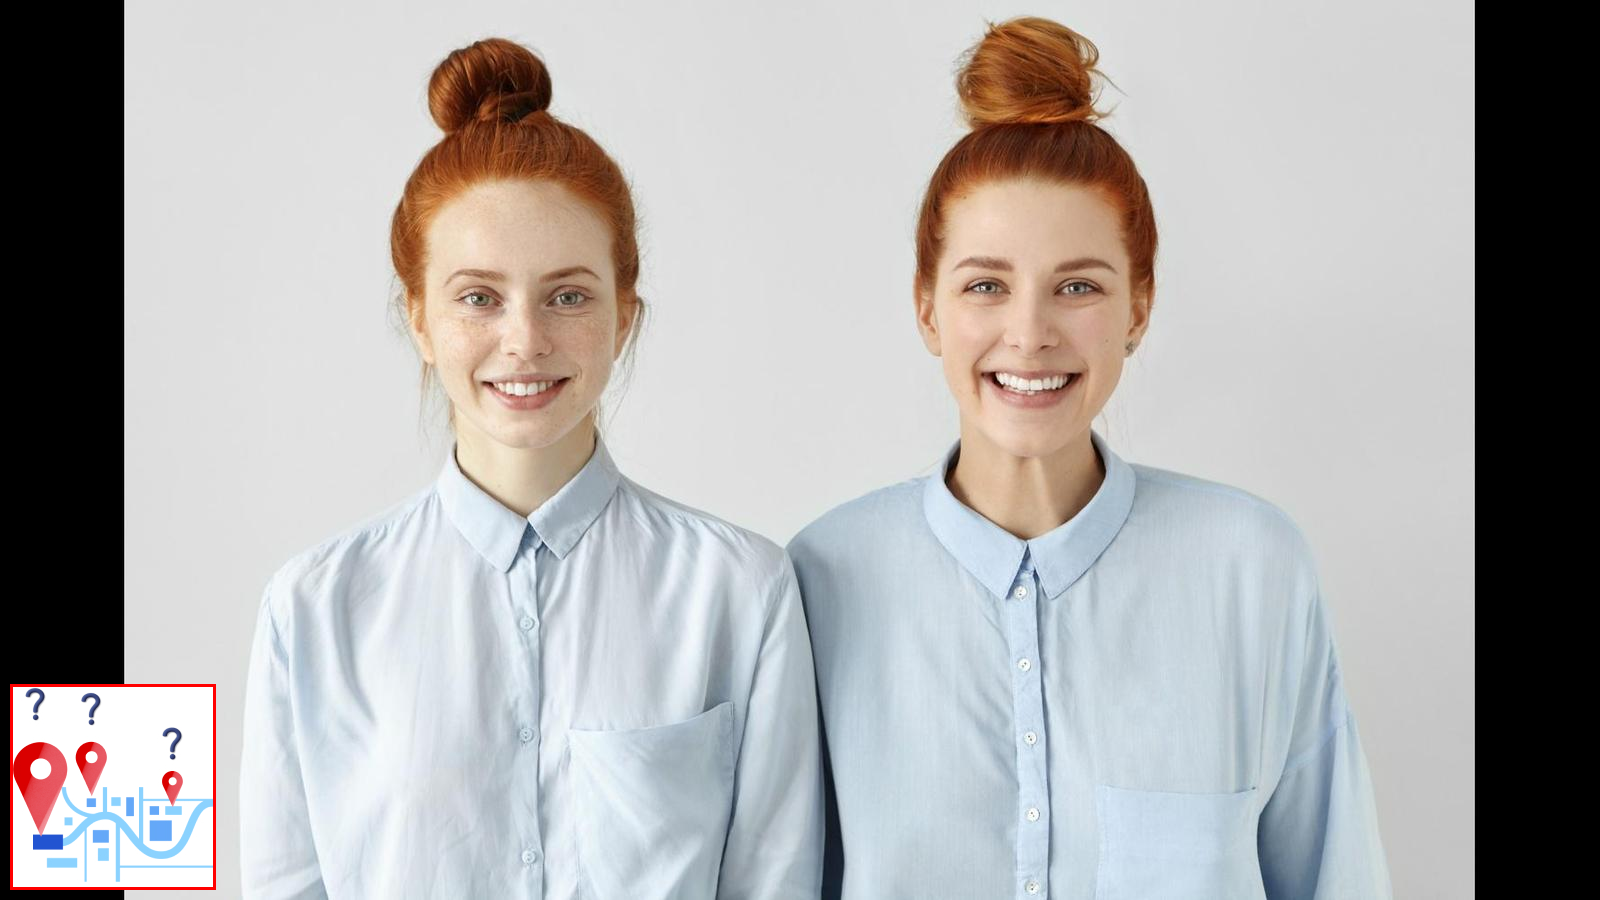

In [27]:
pic1 = picture_in_picture("gibi.jpg", "Group 36.jpg", add_pic_pos = ["bottom","left"], add_pic_margin = 10, border_color = "red")
pic1

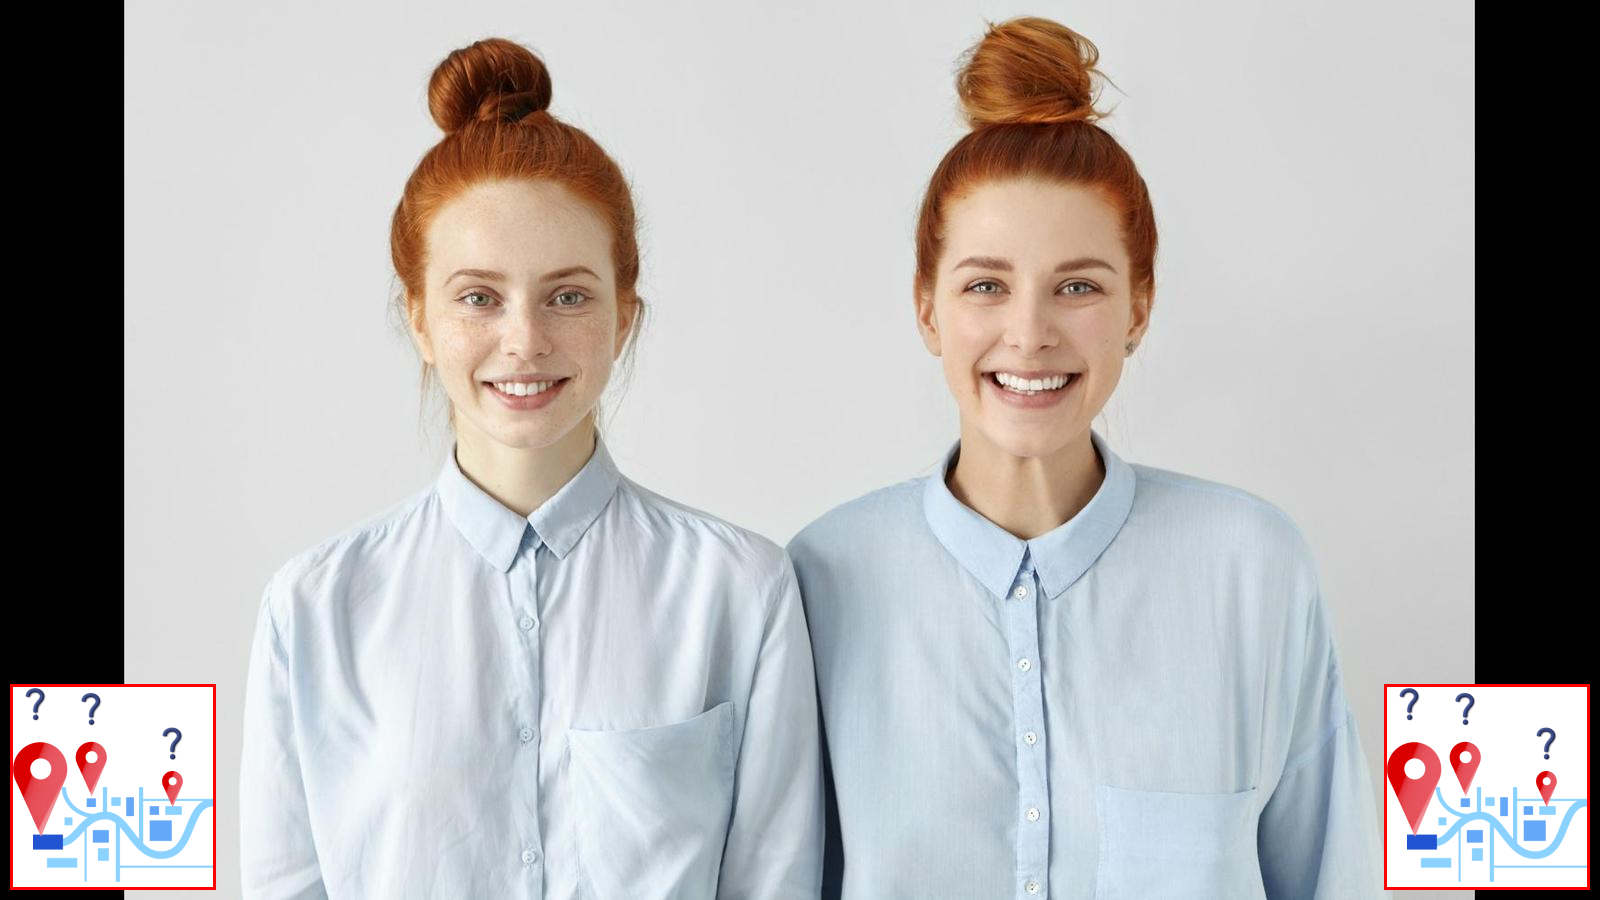

In [28]:
pic2 = picture_in_picture(pic1, "Group 36.jpg", add_pic_pos = ["bottom","right"], add_pic_margin = 10, border_color = "red")
pic2

#### Copy Move And Delete

In [26]:
output_file = glob.glob(f"Visual_Genome_{file_ext}_Word_Lemma_Coordinate_Search_Result.csv")
output_file

['Visual_Genome_1000_Word_Lemma_Coordinate_Search_Result.csv']

In [27]:
for l in output_file:
    source = l # source directory
    destination = path
    shutil.copy2(source, destination)

In [28]:
for j in output_file:
    try:
        os.remove(j)
    except:
        pass

#### Temp

In [ ]:
# test
path = "/media/kurubal/SSD/Data Scientist/Data Science/Data-Scientist/Work/Modern Ways/Lemma Stem Pos/Product/Find Word Image In Data"

In [ ]:
os.path.split(path)[1]

'Find Word Image In Data'

In [ ]:
image_path_file = "/home/kurubal/Downloads/2333869.jpg"

In [ ]:
image_padding_aspect_ratio_standalone(image_path_file, padding_color = (0,0,0), aspect_ratio_width = 16, aspect_ratio_height = 9)

[]